# Adversarial example generation using Fast Gradient Sign method

## What are adversarial examples?

Is it impossible to fool the vision system of a self-driving Tesla car?

Machine learning models used in malware detection software are too good to be evaded by hackers?

Face recognition systems in airports and everywhere else are bulletproof?

### Quick answer is NO!.

There are easy ways to build **adversarial examples** that can fool any deep learning model and create security issues.

In this notebook, We will use the Iterative Fast Gradient Sign method to generate and adversarial puppy, that fools [`Inception-v3`](https://en.wikipedia.org/wiki/Inceptionv3)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Iterative Fast Gradient Sign Method



In [2]:
# original image
url = 'https://drive.google.com/uc?export=download&id=1uYggdWONnyMfiScwSVv2RQC7mVeCnPq6'

## 1. Load clean image

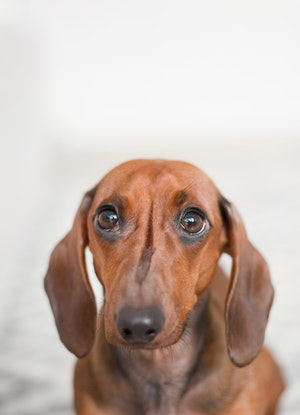

In [3]:
import requests
import io
from PIL import Image

response = requests.get(url)
img = Image.open(io.BytesIO(response.content))
img

## 2. Load image classification model we want to fool

### `inception_v3` in this case

In [4]:
from src.model import load_model

model = load_model()

27,161,264 parameters


## 3. The original image is *clean*, and does not fool the model

/Users/paulabartabajo/src/online-courses/blogs/adversarial_ml/src/.venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


{'id': 168, 'label': 'redbone', 'confidence': 0.8855}


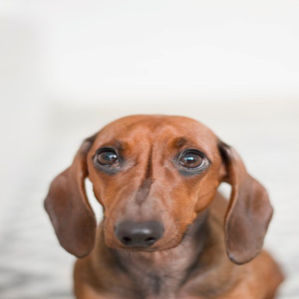

In [5]:
from src.model import preprocess, predict, inverse_preprocess

# preprocess original image
x_original = inverse_preprocess(preprocess(img))
# and make sure the model predicts
x_predictions = predict(model, x_original)

print(x_predictions)
x_original

## 4. Iterative Fast Gradient Sign method

The idea behind this method is simple:

- We take a clean image (the puppy from above)
- compute the gradient of the loss with respect to the input image pixels
- and take an ascending step in the gradient's direction, because we want to increase the loss, and hence the model error.

If the model incorrectly classifies this new image, we are done. Otherwise, we these 3 steps starting from this new image.

In this example below I *transform* a dog into a paper-towel.

In [6]:
# iterative fast gradient sign parameters
epsilon = 0.09
n_steps = 9
alpha = 0.025

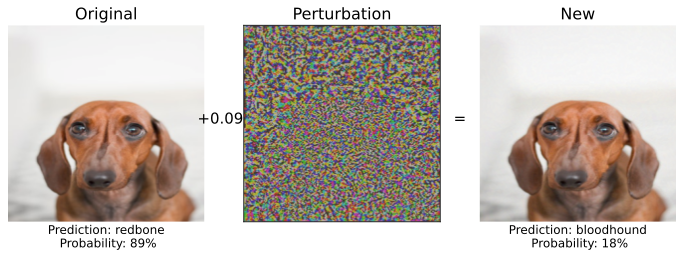

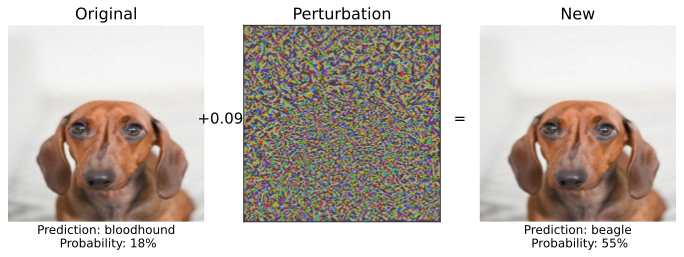

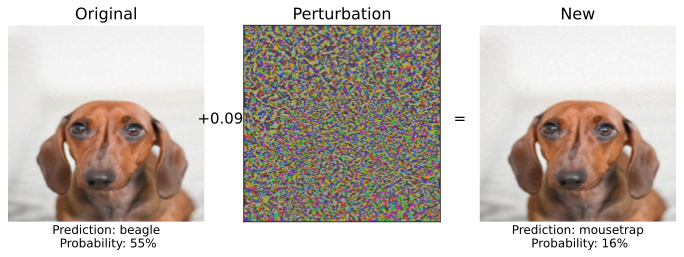

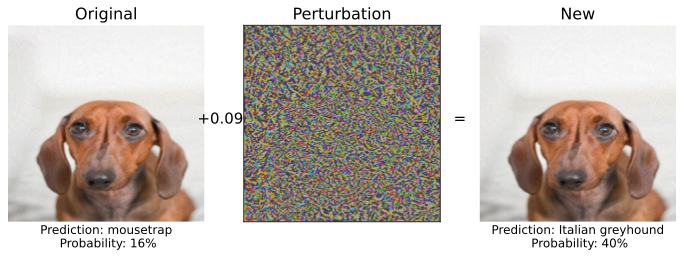

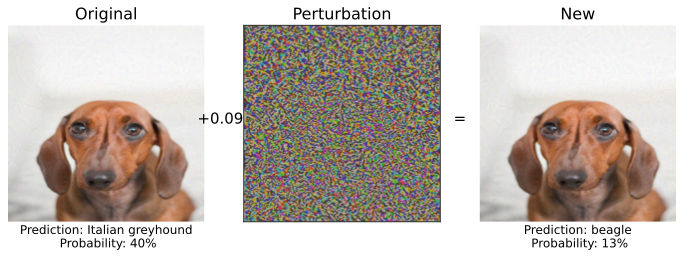

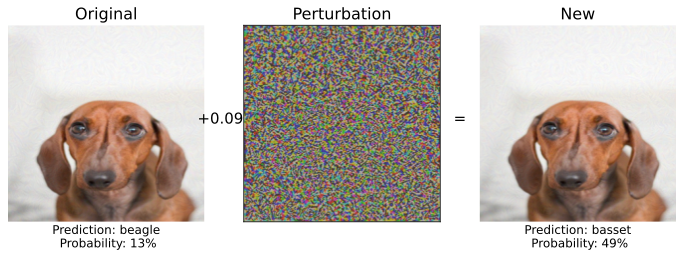

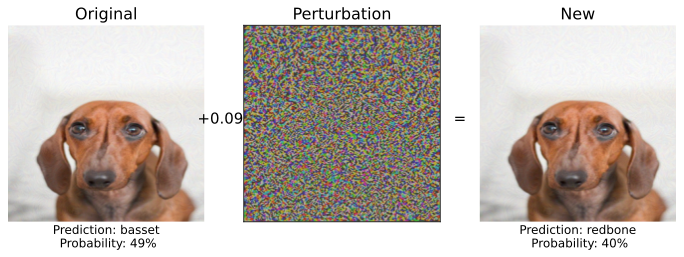

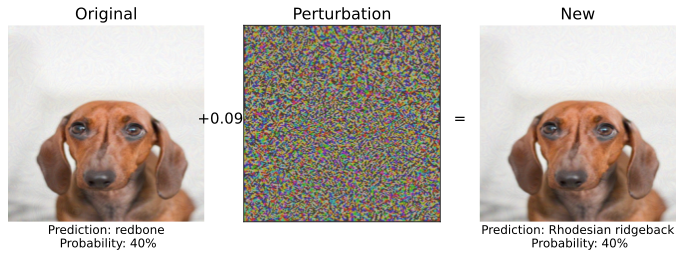

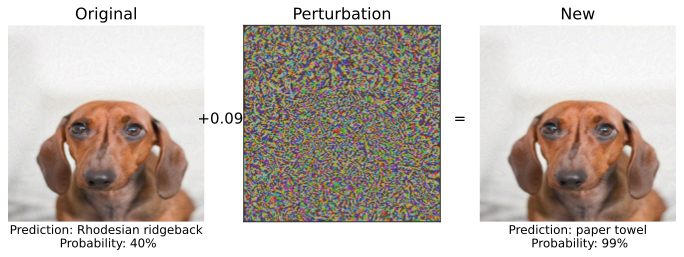

In [7]:
from src.fgsm import iterative_fast_gradient_sign_
from src.viz import plot

# iterator function, because we want to later print each iteration output.
iterator = iterative_fast_gradient_sign_(
    model,
    preprocess(img),
    epsilon,
    n_steps=n_steps,
    alpha=alpha
)

for x_adv, grad in iterator:

    # get model predictions
    x_adv_predictions = predict(model, x_adv)
    
    plot(x_original, x_adv, grad, epsilon,
         x_label=x_predictions['label'],
         x_prob=x_predictions['confidence'],
         x_adv_label=x_adv_predictions['label'],
         x_adv_prob=x_adv_predictions['confidence'])
    
    # starting image new iteration
    x_original = x_adv
    x_predictions = predict(model, x_original)